# Recognizing hand-written digits

This notebook is based on an scikit-learn example which can be found [here](https://scikit-learn.org/1.4/auto_examples/classification/plot_digits_classification.html#sphx-glr-auto-examples-classification-plot-digits-classification-py)

> Author: Gael Varoquaux (gael.varoquaux@normalesup.org) <br>
> License: BSD 3 clause

In [28]:
# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifier and performance metrics
from sklearn import datasets, metrics, svm
from sklearn.model_selection import train_test_split

## Digits dataset

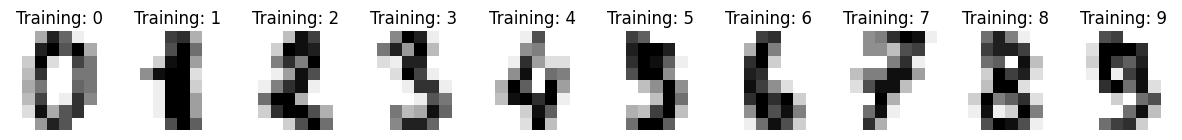

In [29]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=10, figsize=(15,5))
for ax, image, label in zip(axes, digits.images, digits.target):
  ax.set_axis_off()
  ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
  ax.set_title(f"Training: {label}") 

## Classification

### flatten the images

In [30]:
n_samples = len(digits.images)
n_samples

1797

datasets contains 1797 images in total where these images are 8x8 pixels

In [31]:
data = digits.images.reshape((n_samples, -1))
data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [32]:
data.shape

(1797, 64)

### Create a support vector classifier (SVM)

In [33]:
clf = svm.SVC(gamma=0.001)
clf

SVC(gamma=0.001)

### Split data to train and test subsets

In [34]:
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.5, shuffle=False)

In [35]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (898, 64)
Shape of X_test: (899, 64)
Shape of y_train: (898,)
Shape of y_test: (899,)


### Learn the digits on the train subset

In [36]:
clf.fit(X_train, y_train)

SVC(gamma=0.001)

### Predict the value on test subset

In [37]:
predicted = clf.predict(X_test)
predicted[0]

8

### Visualize the results

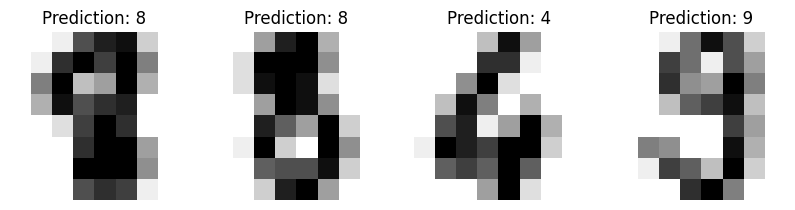

In [38]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10,3))
for ax, image, prediction in zip(axes, X_test, predicted):
  ax.set_axis_off()
  image = image.reshape(8,8)
  ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
  ax.set_title(f"Prediction: {prediction}")

### Classification report

In [39]:
print(
  f"Classification report for classifier {clf}:\n"
  f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899




### Confusion matrix

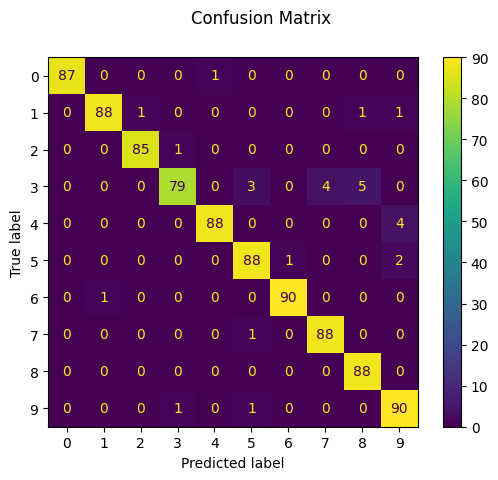

In [40]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
#print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

### Classification report from confusion matrix

In [41]:
y_true = []
y_pred = []
cm = disp.confusion_matrix

for gt in range(len(cm)):
  for pred in range(len(cm)):
    y_true += [gt] * cm[gt][pred]
    y_pred += [pred] * cm[gt][pred]

print(
    "Classification report rebuilt from confusion matrix:\n"
    f"{metrics.classification_report(y_true, y_pred)}\n"
)

Classification report rebuilt from confusion matrix:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899


